# Relationship between Spending Behaviour and Credit Score

### Introduction
A credit score is important for one to take out a loan for a house or other assets that require a high-risk purchase. Therefore, being able to know what to spend or save up your money to maintain a high credit score is essential for ensuring that you can purchase these expensive assets. Using past data on other people’s financial decisions and features can show or predict what one should do to keep a high credit score, which is the purpose of this project.

We will try to answer the following questions:
- How do spending behaviours may impact one’s credit score?
- And can we predict one’s credit score based on spending behaviours?

Our dataset comprises 1000 customers, with 84 features of their financial behaviour used to gauge the data's use in estimating credit risk and potential defaults.

### Methods

- We will first explore the relationships between income, savings, debt, and credit score. If we cannot find a strong correlation/ prediction, we will change the predictors by dividing the predictors into more sub-categories (e.g. Gambling spending, Housing spending, Education spending, etc) and selecting variables that we believe have a stronger impact on credit score.
- Then, with the variables that correlate with credit score, we will use those as predictors to train the regression model
- We will use the KNN Regression or Linear Regression model (since we haven't learned the Linear Regression model in class yet).
- Finally, we will use v-fold and similar functions to tune our regression model.

We can visualize our data by plotting our predicted values along the training/ testing model to visualize the trend and our accuracy.
### Expected Outcome and Significance

TODO




### Preliminary Exploratory Data Analysis

In [2]:
library(tidyverse)
library(tidymodels)
set.seed(1234569)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [6]:
credit_csv <- read_csv("data/credit_score.csv") # Retrieved from "https://www.kaggle.com/datasets/conorsully1/credit-score"

Rows: 1000 Columns: 87
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): CUST_ID, CAT_GAMBLING
dbl (85): INCOME, SAVINGS, DEBT, R_SAVINGS_INCOME, R_DEBT_INCOME, R_DEBT_SAV...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Data Cleaning & Wrangling

In [8]:
# colnames(credit_score)
credit_score <- select(credit_csv, INCOME, SAVINGS, DEBT, CREDIT_SCORE)
# credit_score <- filter(credit_score, !(INCOME == 0 | SAVINGS == 0 | DEBT == 0))
# credit_score

In [9]:
credit_split <- initial_split(credit_score, 0.75, strata = CREDIT_SCORE)
credit_training <- training(credit_split)
credit_testing <- testing(credit_split)
# credit_training
# credit_testing

#### Summary of Training Data

In [10]:
credit_summary <- summarize(credit_training, 
                            avg_income = mean(INCOME), 
                            avg_savings = mean(SAVINGS), 
                            avg_debt = mean(DEBT),
                            avg_credit = mean(CREDIT_SCORE))
credit_summary

avg_income,avg_savings,avg_debt,avg_credit
<dbl>,<dbl>,<dbl>,<dbl>
121431.1,421981.9,789687.1,586.7503


Generating Graphs for the 3 different predictor values

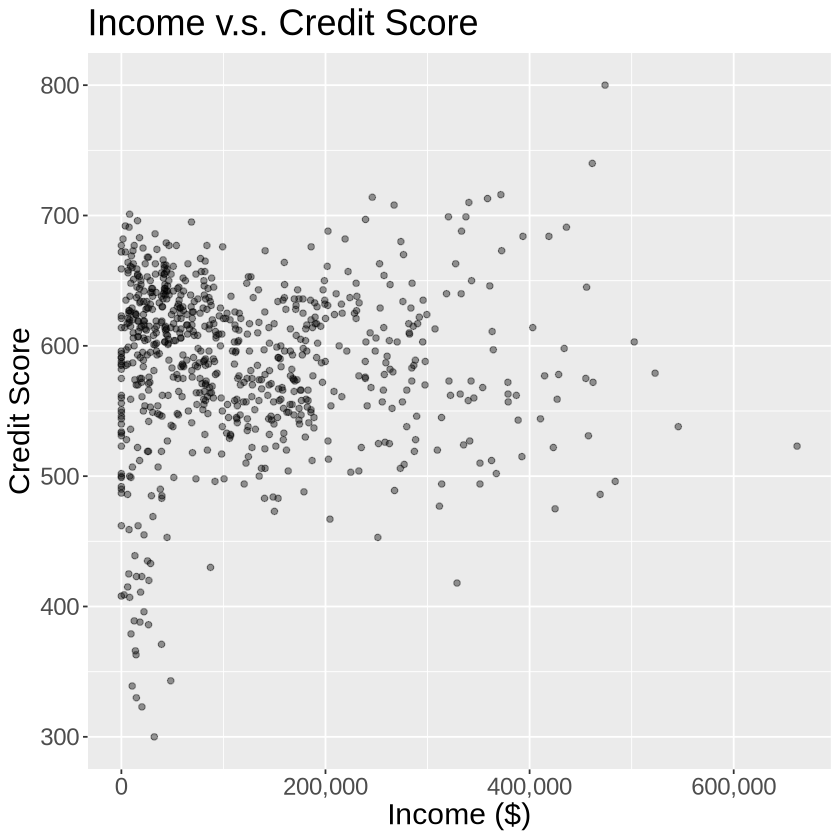

In [28]:
plot_income <- ggplot(credit_training, aes(x = INCOME, y = CREDIT_SCORE)) +
    geom_point(alpha = 0.4) +
    labs(x = "Income ($)",
         y = "Credit Score",
        title = "Income v.s. Credit Score") +
    theme(text=element_text(size = 18)) +
    scale_x_continuous(labels = comma)
plot_income

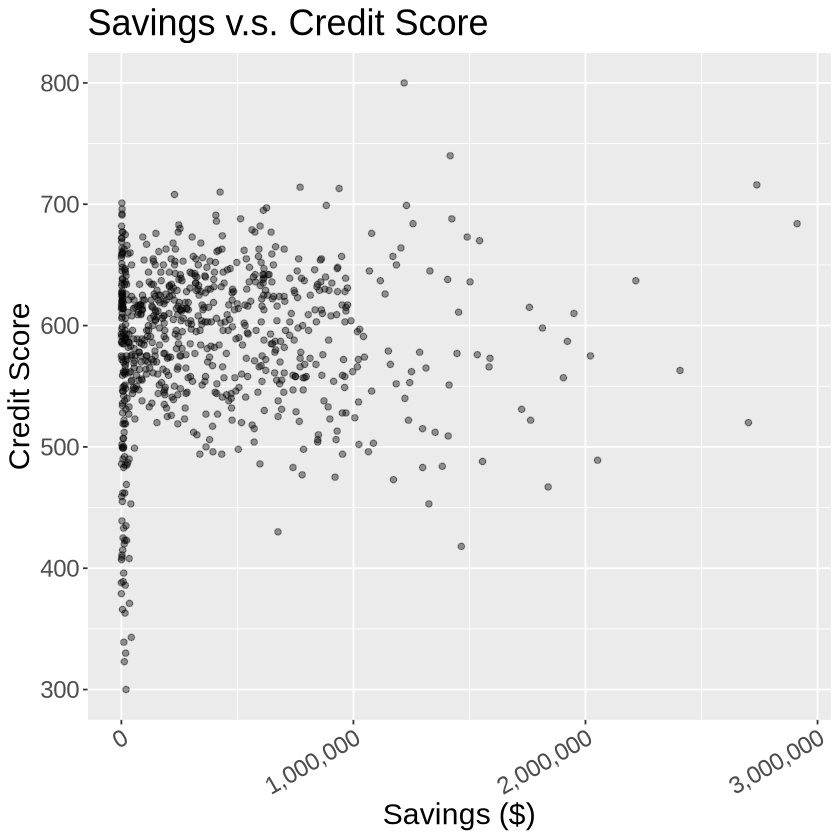

In [29]:
plot_savings <- ggplot(credit_training, aes(x = SAVINGS, y = CREDIT_SCORE)) +
    geom_point(alpha = 0.4) +
    labs(x = "Savings ($)",
         y = "Credit Score",
        title = "Savings v.s. Credit Score") +
    theme(text=element_text(size = 18)) +
    scale_x_continuous(labels = comma) +
    theme(axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1))
plot_savings

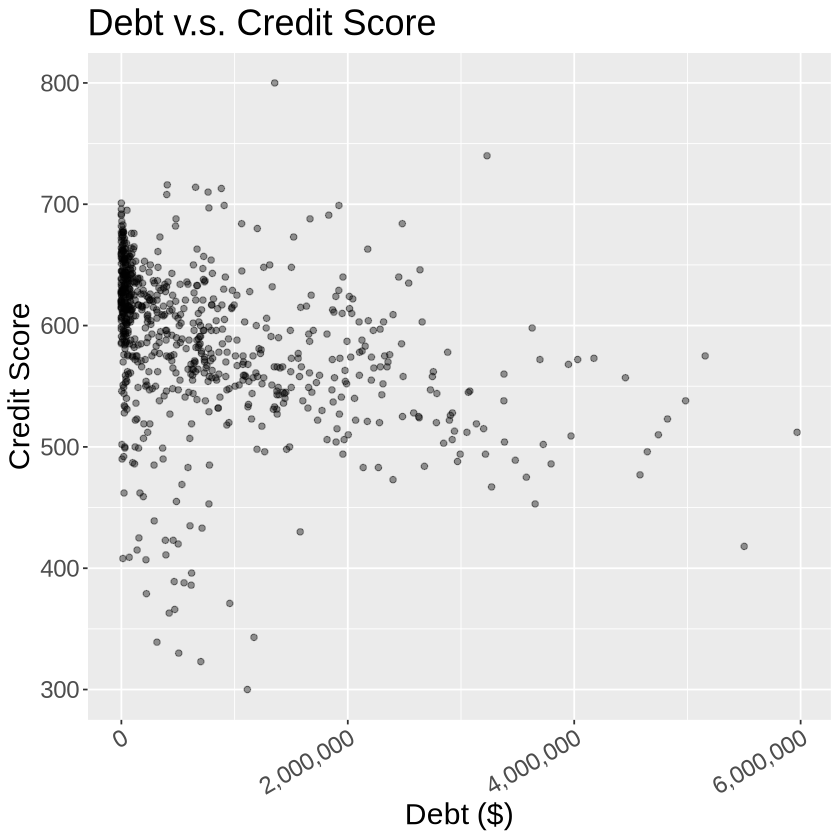

In [30]:
plot_debt <- ggplot(credit_training, aes(x = DEBT, y = CREDIT_SCORE)) +
    geom_point(alpha = 0.4) +
    labs(x = "Debt ($)",
         y = "Credit Score",
        title = "Debt v.s. Credit Score") +
    theme(text=element_text(size = 18)) +
    scale_x_continuous(labels = comma) +
    theme(axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1))
plot_debt